In [1]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers
from keras import optimizers


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math

2023-11-14 23:40:51.736236: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 23:40:52.152865: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 23:40:52.153094: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 23:40:52.156327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 23:40:52.375041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 23:40:52.376957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
epochs = 30
model_file_name = "model/Model14Nov.h5"
plot_file_name = "img/training-overfittingPlot14Nov"
confusion_matrix_plot_file_name = "img/confusionMatrix14Nov"
NN_structure_file = 'img/NN-structure.png'
load_model = False

In [3]:
# Data Augumentation for test data
train_datagen = ImageDataGenerator( 
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory('Selfies/Train',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

valid_gen=test_datagen.flow_from_directory('Selfies/Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')



Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
kernel_size=(3,3) # The size of kernel

model=models.Sequential()
model.add(layers.Conv2D(32, kernel_size, activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2023-11-14 23:40:56.786401: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


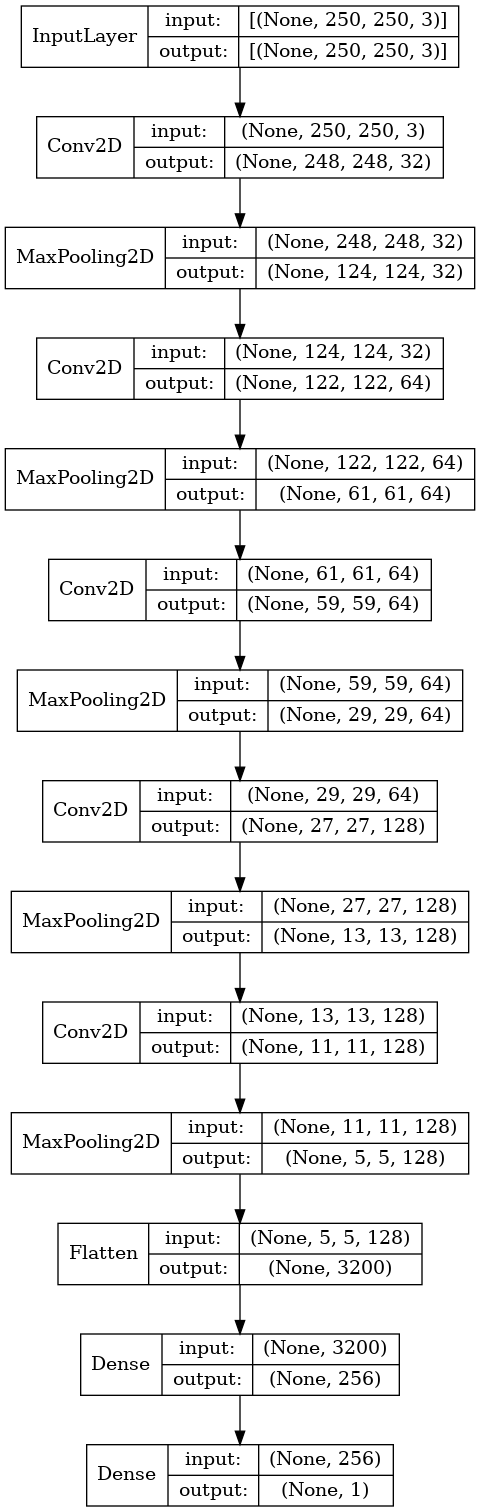

In [5]:
# to print the NN structure
from keras import layers, models
from keras.utils import plot_model

plot_model(model, to_file=NN_structure_file, show_shapes=True, show_layer_names=False)

In [6]:
history=model.fit(train_gen,epochs=epochs,
                  validation_data=valid_gen)

model.save(model_file_name)

Epoch 1/30


2023-11-14 23:41:00.617833: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 377880576 exceeds 10% of free system memory.
2023-11-14 23:41:03.754996: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 377880576 exceeds 10% of free system memory.


 1/84 [..............................] - ETA: 9:40 - loss: 0.7042 - accuracy: 0.4792

2023-11-14 23:41:05.292760: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 377880576 exceeds 10% of free system memory.
2023-11-14 23:41:08.028287: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 377880576 exceeds 10% of free system memory.


 2/84 [..............................] - ETA: 5:18 - loss: 0.7659 - accuracy: 0.4583

2023-11-14 23:41:09.170153: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 377880576 exceeds 10% of free system memory.


84/84 [==============================] - 301s 4s/step - loss: 0.6994 - accuracy: 0.5107 - val_loss: 0.6870 - val_accuracy: 0.5650
Epoch 2/30
84/84 [==============================] - 293s 3s/step - loss: 0.6890 - accuracy: 0.5560 - val_loss: 0.6838 - val_accuracy: 0.5560
Epoch 3/30
84/84 [==============================] - 292s 3s/step - loss: 0.6780 - accuracy: 0.5830 - val_loss: 0.6775 - val_accuracy: 0.5520
Epoch 4/30
84/84 [==============================] - 291s 3s/step - loss: 0.6522 - accuracy: 0.6330 - val_loss: 0.6311 - val_accuracy: 0.6470
Epoch 5/30
84/84 [==============================] - 290s 3s/step - loss: 0.6104 - accuracy: 0.6658 - val_loss: 0.6034 - val_accuracy: 0.6620
Epoch 6/30
84/84 [==============================] - 289s 3s/step - loss: 0.5837 - accuracy: 0.6875 - val_loss: 0.6501 - val_accuracy: 0.6430
Epoch 7/30
84/84 [==============================] - 291s 3s/step - loss: 0.5646 - accuracy: 0.7107 - val_loss: 0.5714 - val_accuracy: 0.6840
Epoch 8/30
84/84 [======

/home/andrea/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


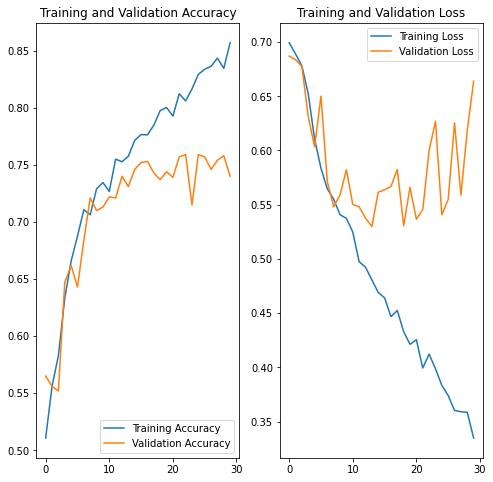

In [7]:
# plot training process to spot if there is overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig(plot_file_name)
plt.show()

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 37s 555ms/step
[[640 360]
 [136 864]]


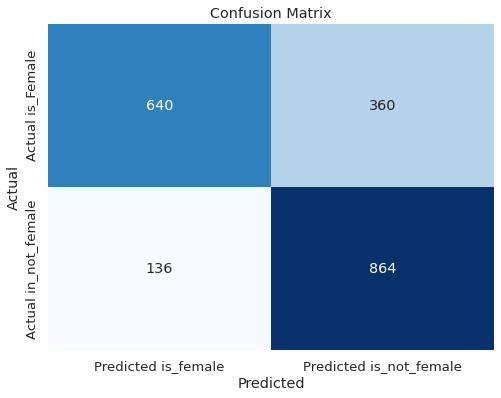

In [8]:
# evaluate model

if load_model:
    model = load_model('model/bestModel30e.h5')
 

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values between 0 and 1

test_generator = test_datagen.flow_from_directory(
    'Selfies/Test/',
    target_size=(250, 250),  # Set the dimensions as per your model
    batch_size=32,
    class_mode='binary',  # This is binary classification
    shuffle=False  # Keep the order of images to match predictions with actual labels
)

test_predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

true_labels = test_generator.classes
confusion = confusion_matrix(true_labels, np.round(test_predictions))
print(confusion)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a heatmap with annotations
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted is_female', 'Predicted is_not_female'],
            yticklabels=['Actual is_Female', 'Actual in_not_female'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(confusion_matrix_plot_file_name)
plt.show()